<a href="https://colab.research.google.com/github/farhath01/Online-Shopper-Purchaisng-Intention/blob/main/ITM_760_Final_Project_(Intention).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from sklearn import tree
from IPython.display import Image

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
intent = pd.read_csv('/content/drive/MyDrive/ITM 760/Final Project/online_shoppers_intention.csv')

# Data Description

In [ ]:
intent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
intent.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
intent.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# Data Cleaning

null values are yellow


<Axes: >

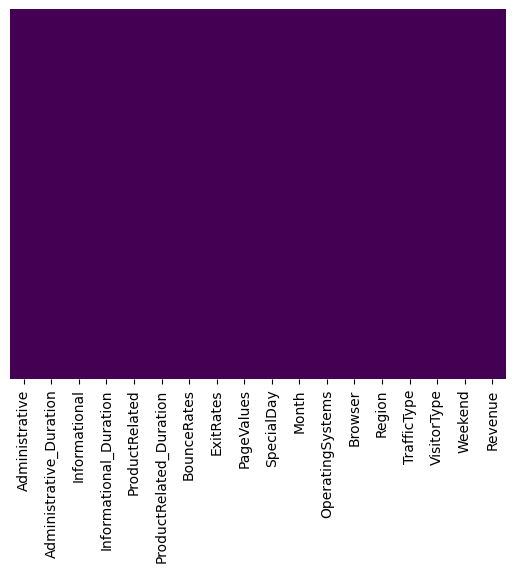

In [ ]:
#null values

print('null values are yellow')
sns.heatmap(intent.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#False is 0 True is 1
intent.Revenue = intent.Revenue.astype('int')
intent.Weekend = intent.Weekend.astype('int')

In [ ]:
intent.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [ ]:
#Identifying categorical and continuos variables

categorical = intent.select_dtypes(include=['object'])

for i in categorical:
    column = categorical[i]
    print('Variable: {} '.format(i,column.nunique()))

Variable: Month 
Variable: VisitorType 


In [ ]:
#checking for missing values
n=intent.isna().sum()
n[n>0]

Series([], dtype: int64)

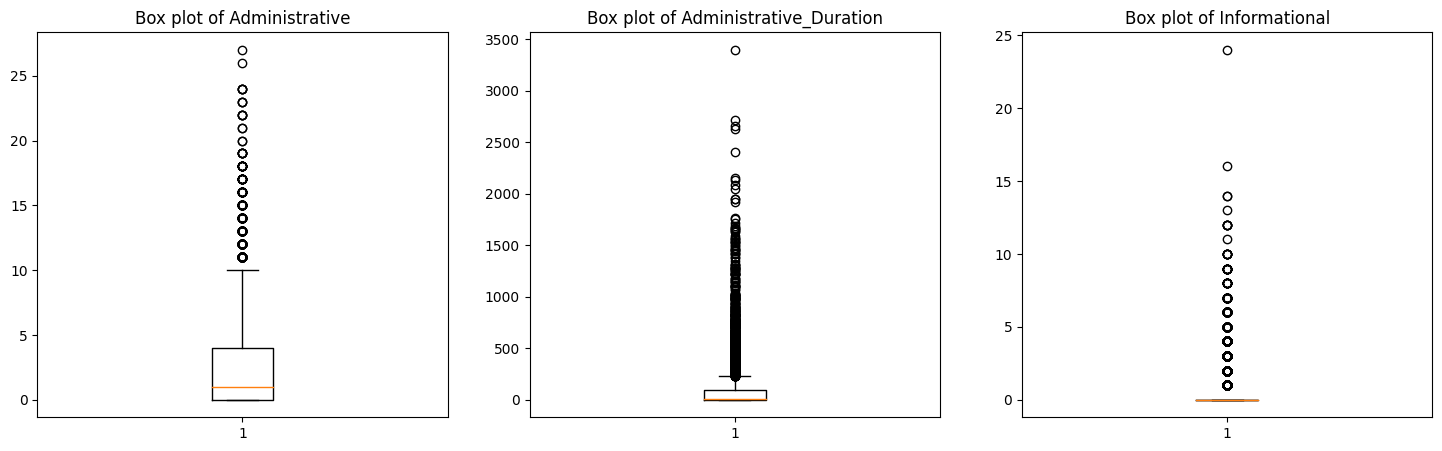

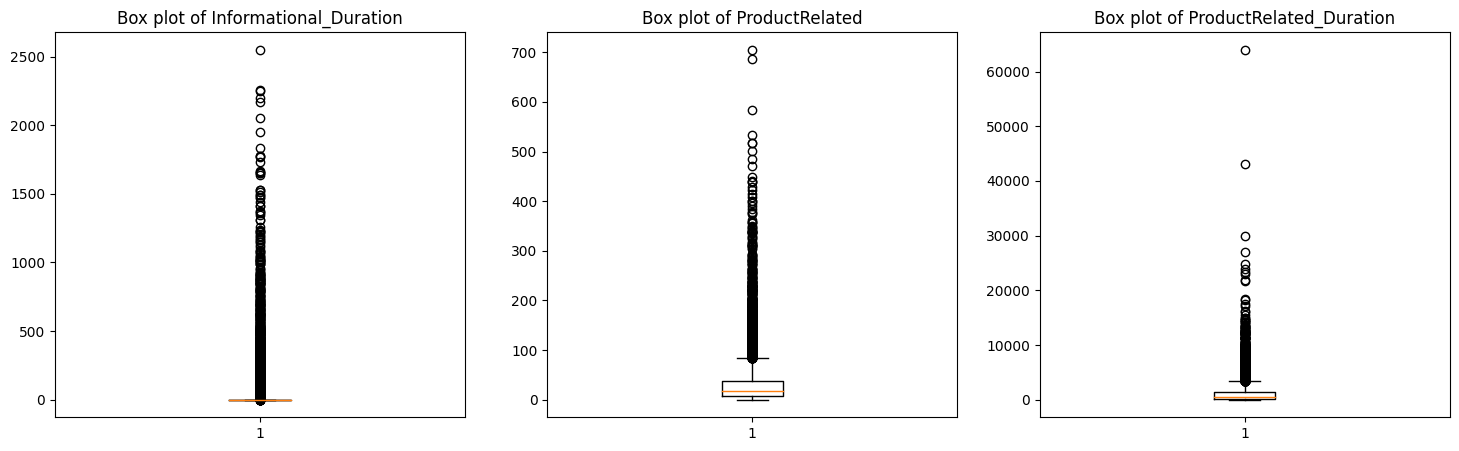

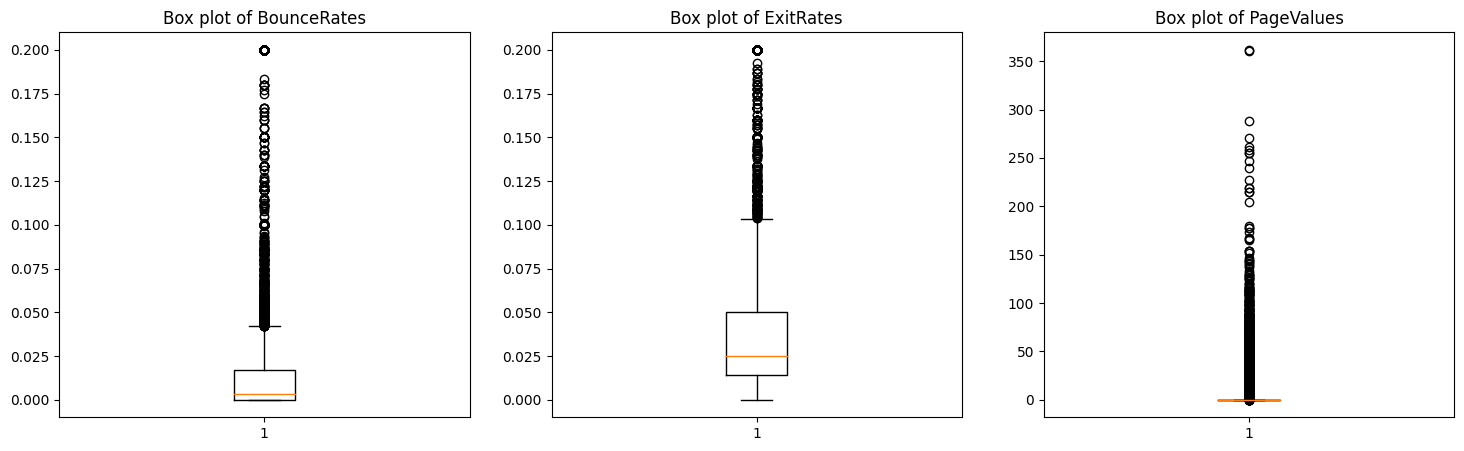

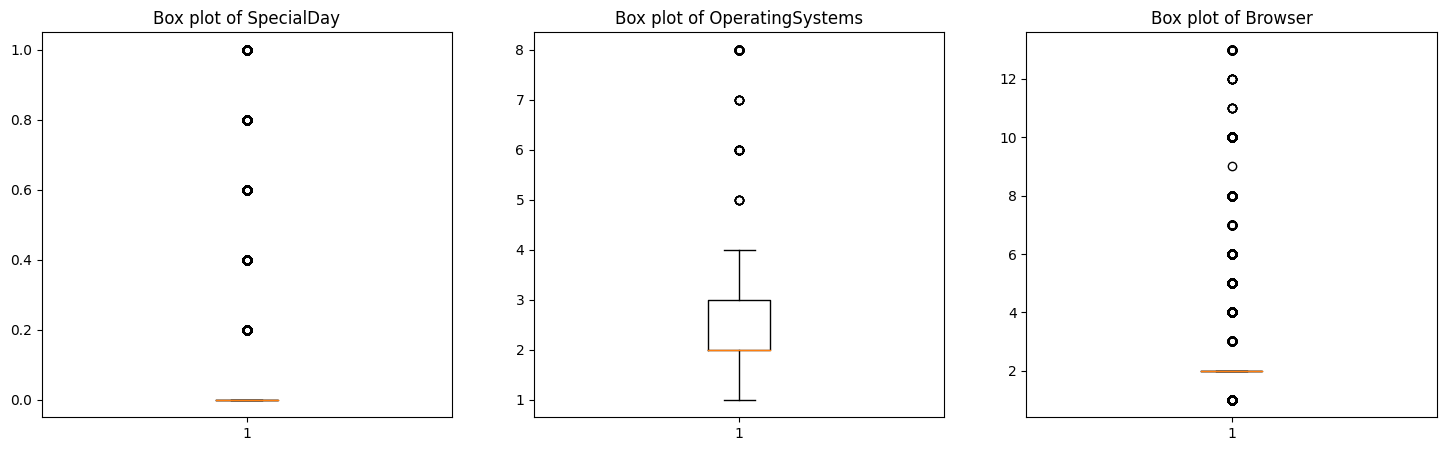

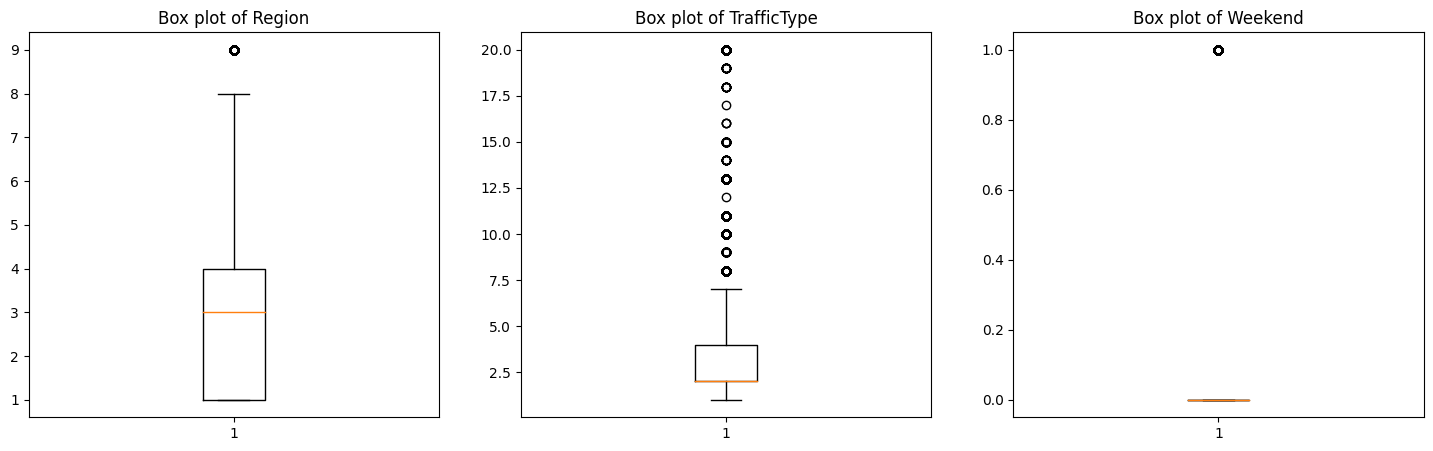

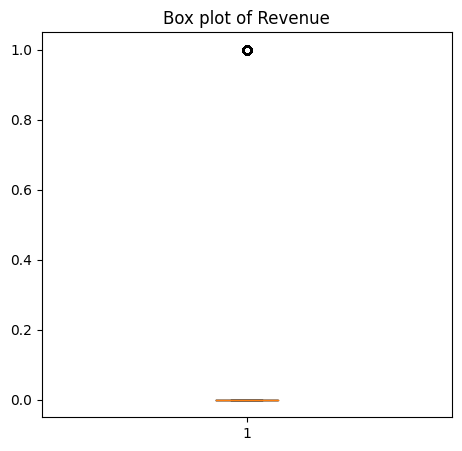

In [ ]:
col = intent.drop(['Month', 'VisitorType'], axis=1).columns

i=0

while i < len(col):

    plt.figure(figsize=(18,5))
    plt.subplot(1,3,1)
    plt.boxplot(intent[col[i]])
    title = 'Box plot of ' + str(col[i])
    plt.title(title)
    
    
    if i+1 < len(col):
        plt.subplot(1,3,2)
        plt.boxplot(intent[col[i+1]])
        title = 'Box plot of ' +  str(col[i+1])
        plt.title(title)

    if i+2 < len(col):
        plt.subplot(1,3,3)
        plt.boxplot(intent[col[i+2]])
        title = 'Box plot of ' +  str(col[i+2])
        plt.title(title)

    i+=3
    
plt.show()

In [ ]:
def outliersinColumns(df):
    
    columns_outliers = []
    for column in df.columns:

        if intent[column].nunique() > 2:  #Apply for variables with 3 or more unique values

            for value in df[column]:
                if value:
                    columns_outliers.append(column)
                    break

    return columns_outliers

In [ ]:
Q1 = intent.quantile(0.25)
Q3 = intent.quantile(0.75)
IQR = Q3 - Q1

# False means these values are not outliers
# True they are an outlier
notinvalidarea = (intent < (Q1 - 1.5 * IQR)) | (intent > (Q3 + 1.5 * IQR))

columns_w_outliers = outliersinColumns(notinvalidarea)

# Printing Results
print('Columns that contain outliers: {}'.format(len(columns_w_outliers)))
print('\n')
print(columns_w_outliers)

Columns that contain outliers: 14


['Administrative', 'Administrative_Duration', 'BounceRates', 'Browser', 'ExitRates', 'Informational', 'Informational_Duration', 'OperatingSystems', 'PageValues', 'ProductRelated', 'ProductRelated_Duration', 'Region', 'SpecialDay', 'TrafficType']


<ipython-input-67-98939247e73d>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = intent.quantile(0.25)
<ipython-input-67-98939247e73d>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = intent.quantile(0.75)
<ipython-input-67-98939247e73d>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  notinvalidarea = (intent < (Q1 - 1.5 * IQR)) | (intent > (Q3 + 1.5 * IQR))


/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3

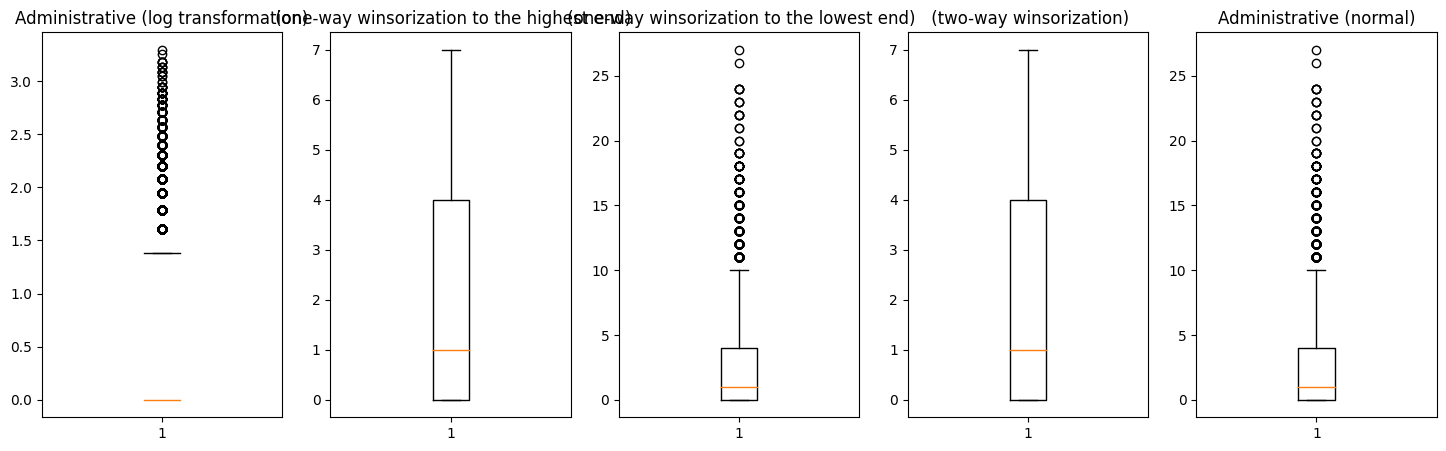

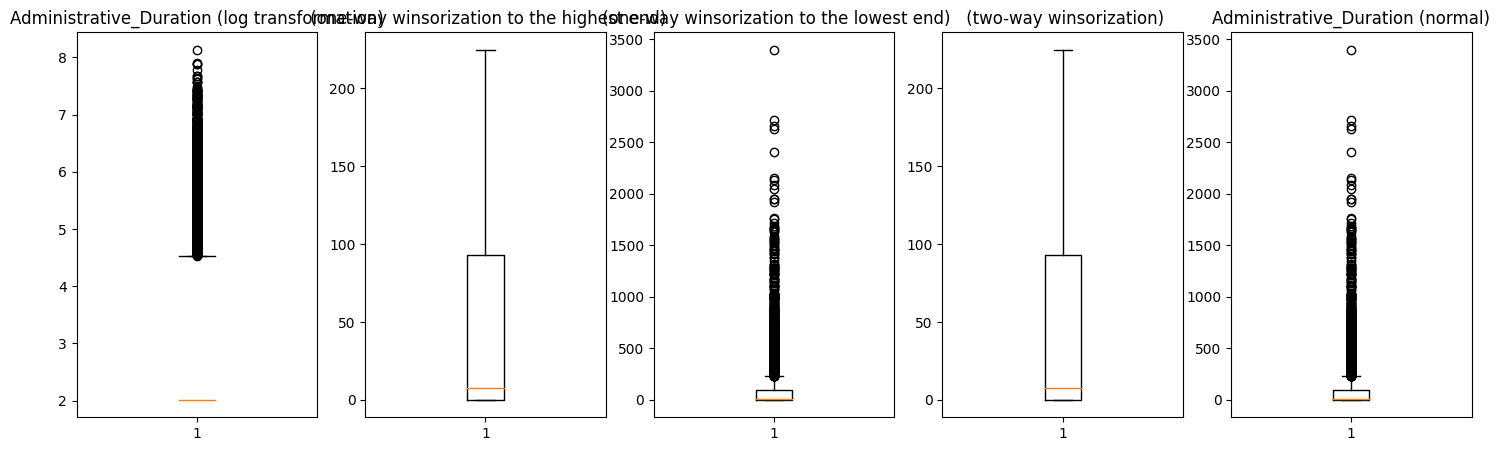

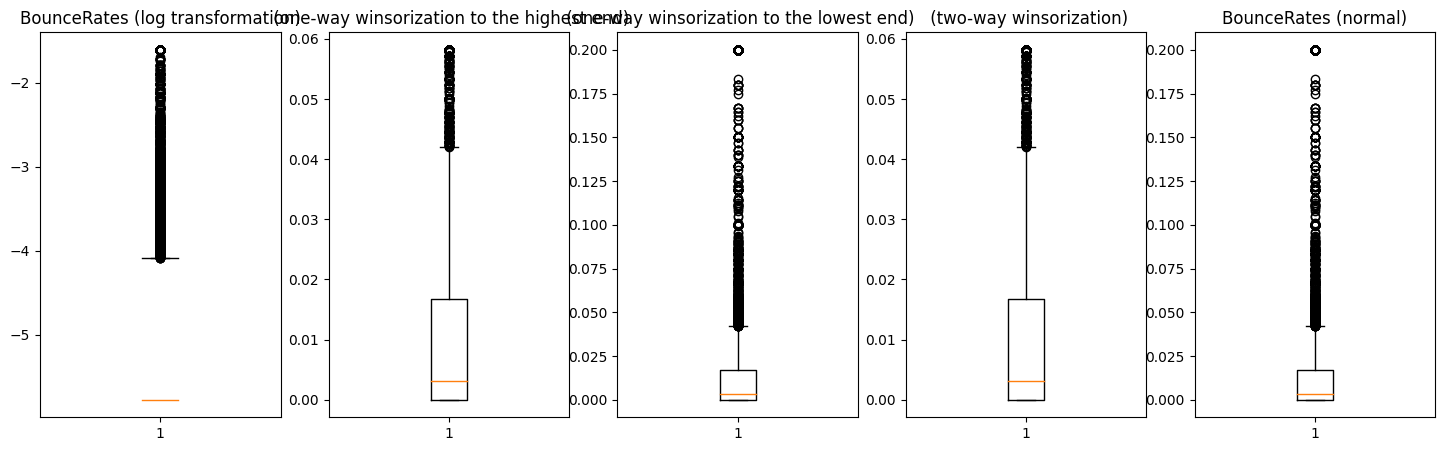

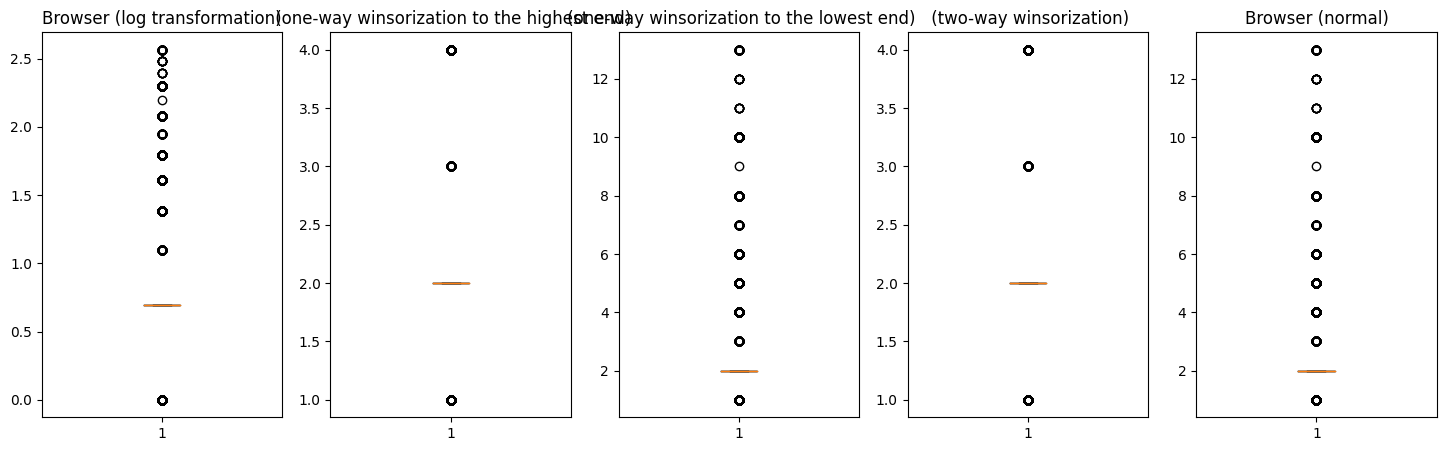

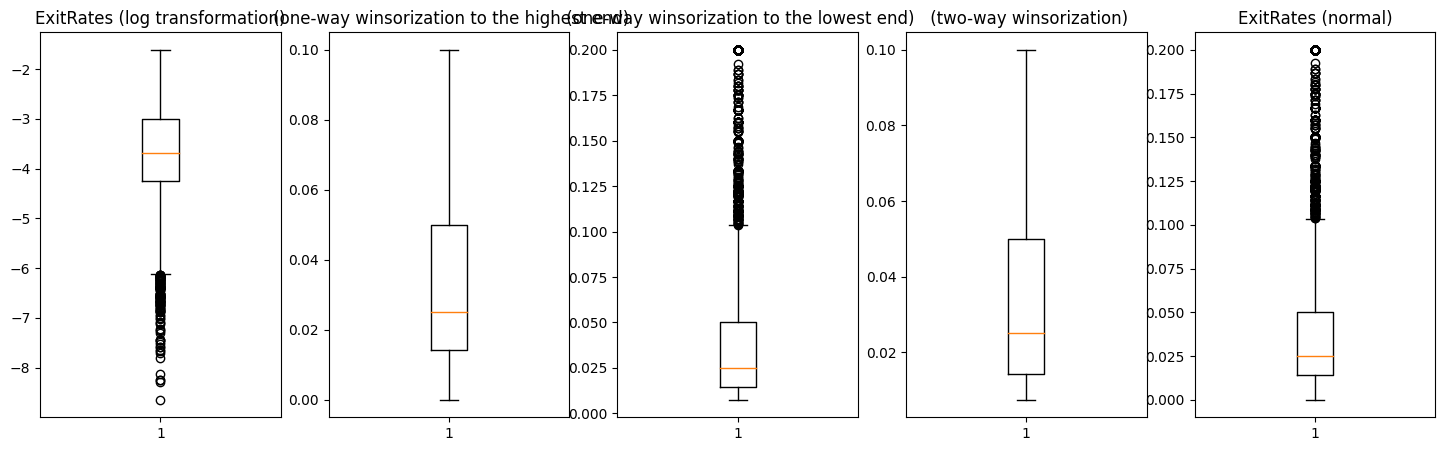

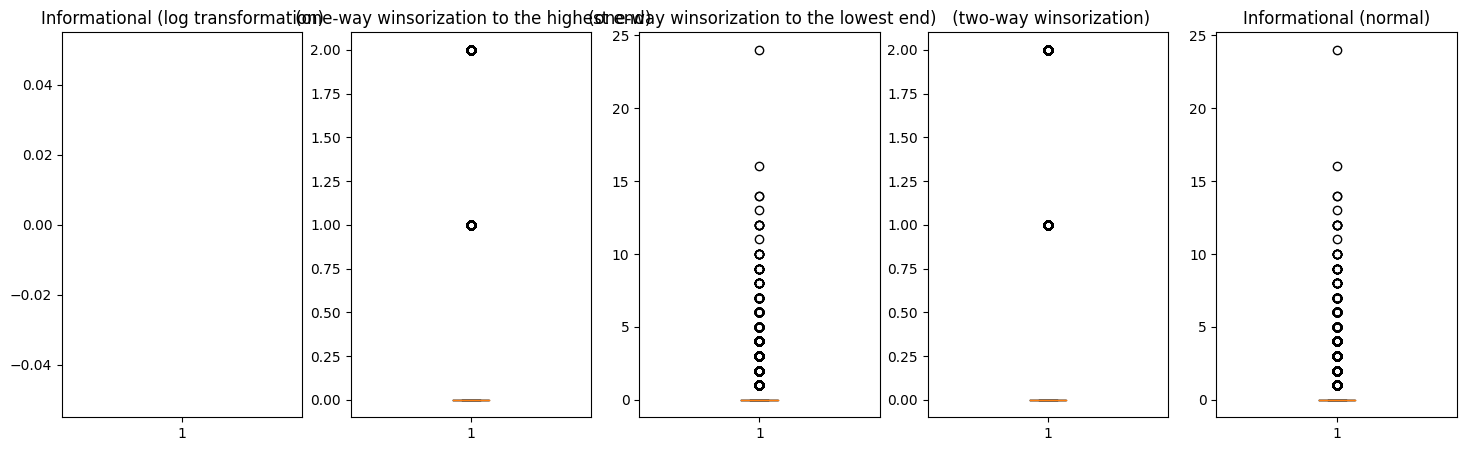

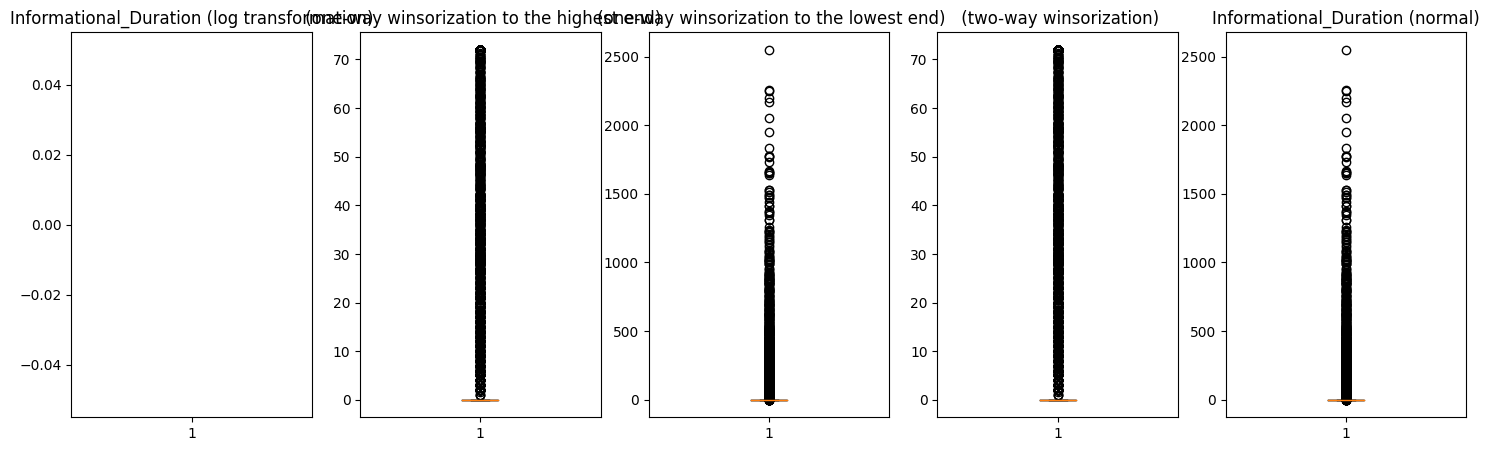

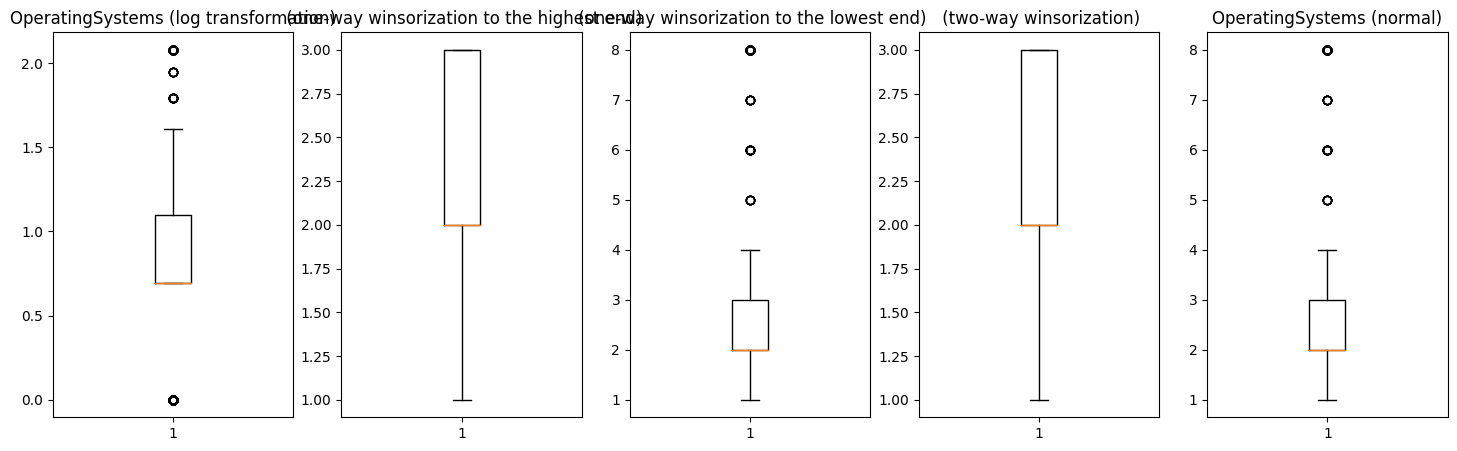

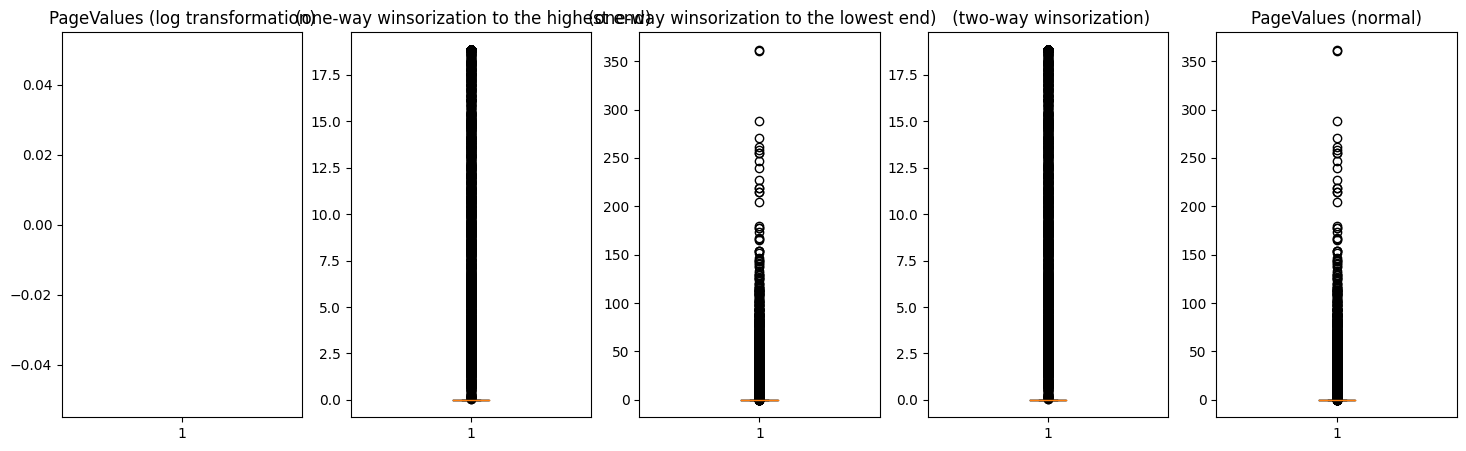

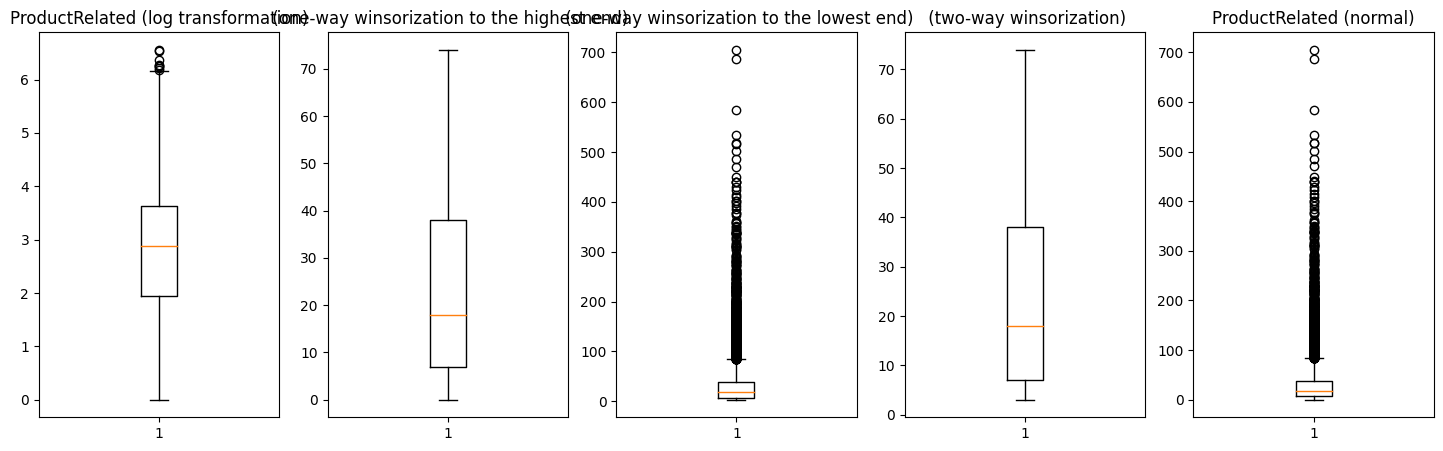

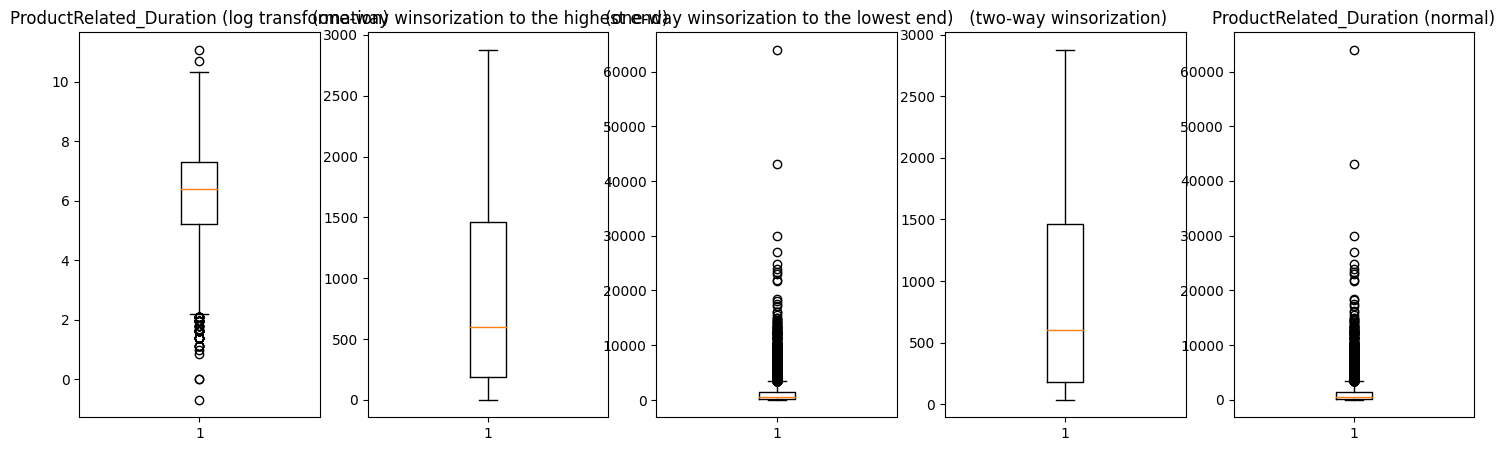

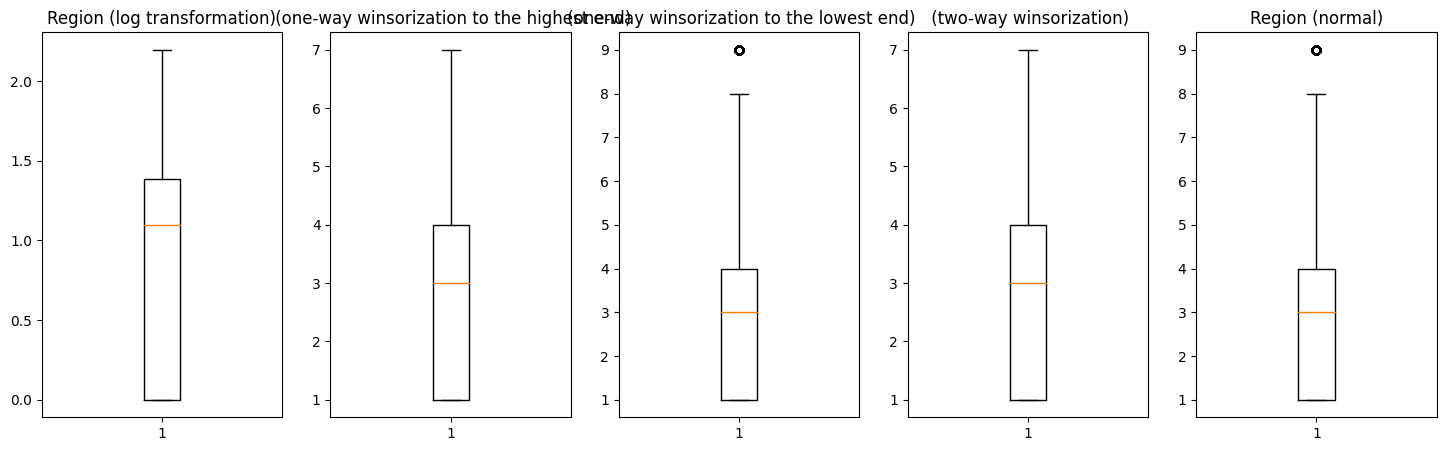

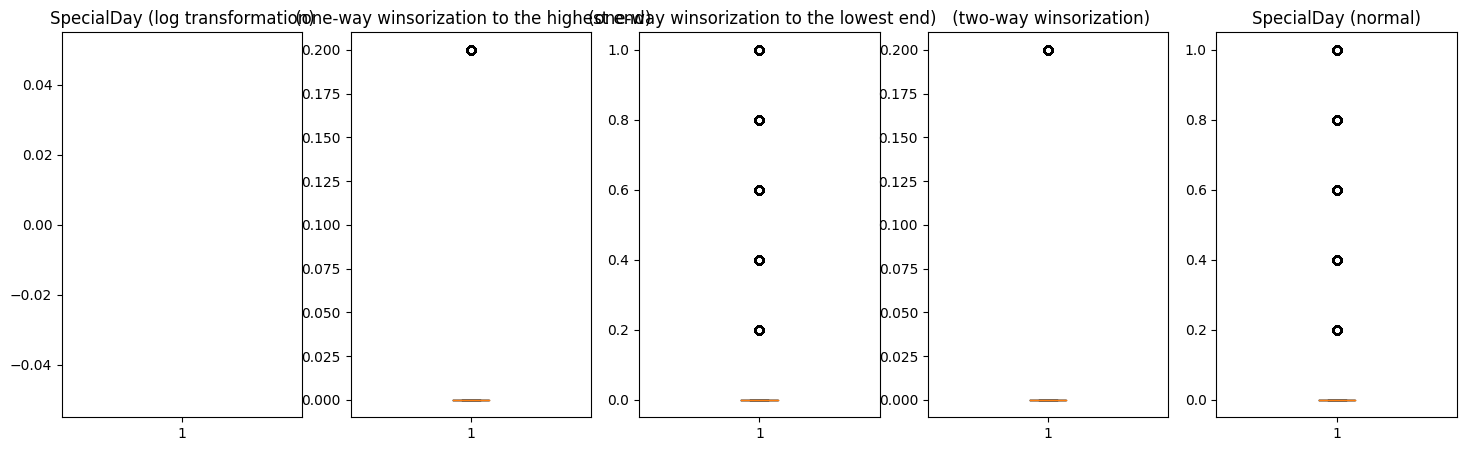

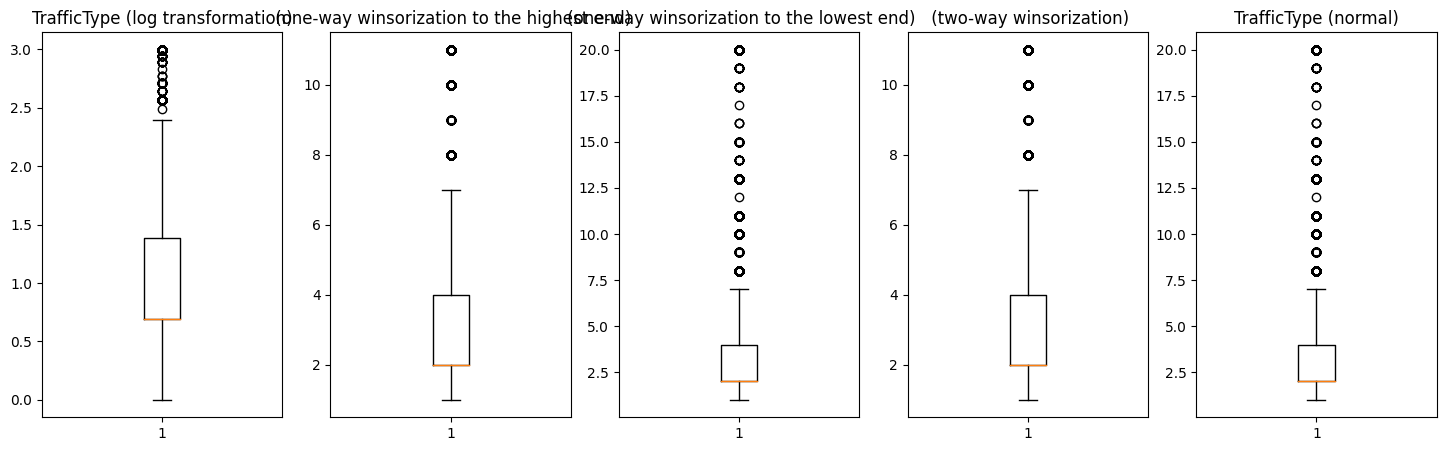

In [ ]:
# Drawing 5 boxplots per row representing  same variable
# Columns from 1 to 4, are following techniques applied to the variable: 
#    log transformation,
#    one-way winsorization to the highest end,
#    one-way winsorization to the lowest end,
#    two-way winsorization,
# The last column shows a boxplot with original values  
from scipy.stats.mstats import winsorize

i=0
while i < len(columns_w_outliers):

    plt.figure(figsize=(18,5), clear=True)
      
    plt.subplot(1,5,1)
    plt.boxplot(np.log(intent[columns_w_outliers[i]]))
    title = str(columns_w_outliers[i]) + ' (log transformation)'
    plt.title(title)
    
    plt.subplot(1,5,2)
    plt.boxplot(winsorize(intent[columns_w_outliers[i]],(0,0.10)))
    title =   ' (one-way winsorization to the highest end)'
    plt.title(title)

    plt.subplot(1,5,3)
    plt.boxplot(winsorize(intent[columns_w_outliers[i]],(0.10,0)))
    title = ' (one-way winsorization to the lowest end)'
    plt.title(title)
    
    plt.subplot(1,5,4)
    plt.boxplot(winsorize(intent[columns_w_outliers[i]],(0.10,0.10)))
    title =  ' (two-way winsorization)'
    plt.title(title)
    
    plt.subplot(1,5,5)
    plt.boxplot(intent[columns_w_outliers[i]])
    title = str(columns_w_outliers[i]) + ' (normal)'
    plt.title(title)
    
    i+=1
    
plt.show()

In [ ]:
#    1 - log transformation,
#    2 - one-way winsorization to the highest end,
#    3 - one-way winsorization to the lowest end,
#    4 - two-way winsorization

t = {'Administrative':4, 'Administrative_Duration':4, 'BounceRates':2, 'Browser':2, 'ExitRates':2, 'Informational':4,
      'Informational_Duration':3, 'OperatingSystems':4, 'PageValues':3, 'ProductRelated':4, 'ProductRelated_Duration':4,
      'Region':4, 'SpecialDay':4, 'TrafficType':1}

In [ ]:
from scipy.stats.mstats import winsorize
for k in t:
    if t[k] == 1:
        intent[k] = np.log(intent[k])
        
    elif t[k] == 2:
        intent[k] = winsorize(intent[k],(0,0.10))

    elif t[k] == 3:
        intent[k] = winsorize(intent[k],(0.10,0))
        
    elif t[k] == 4:
        intent[k] = winsorize(intent[k],(0.10,0.10))

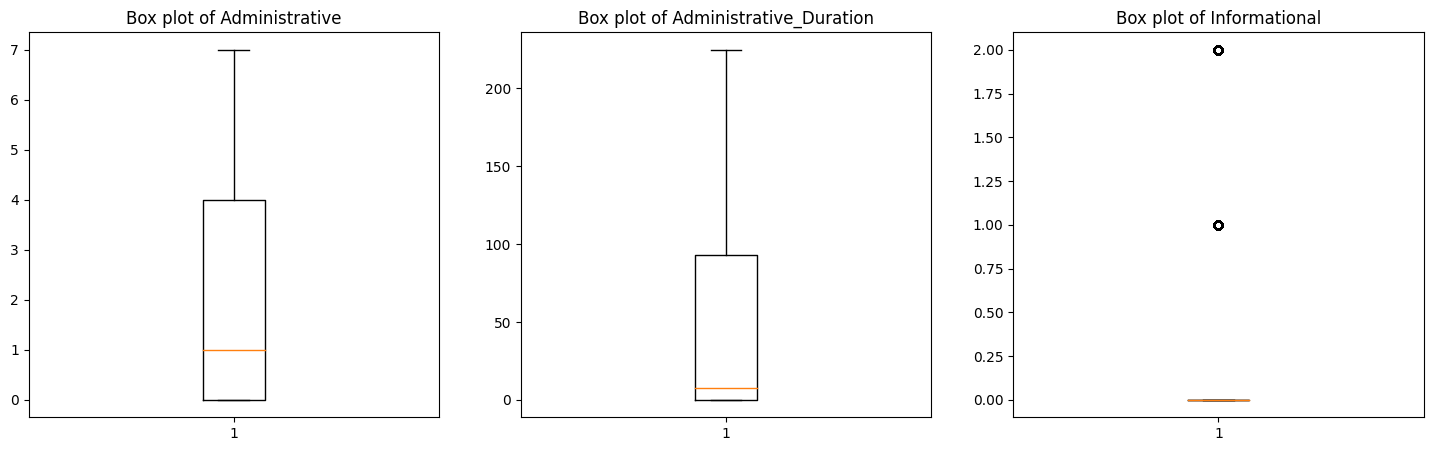

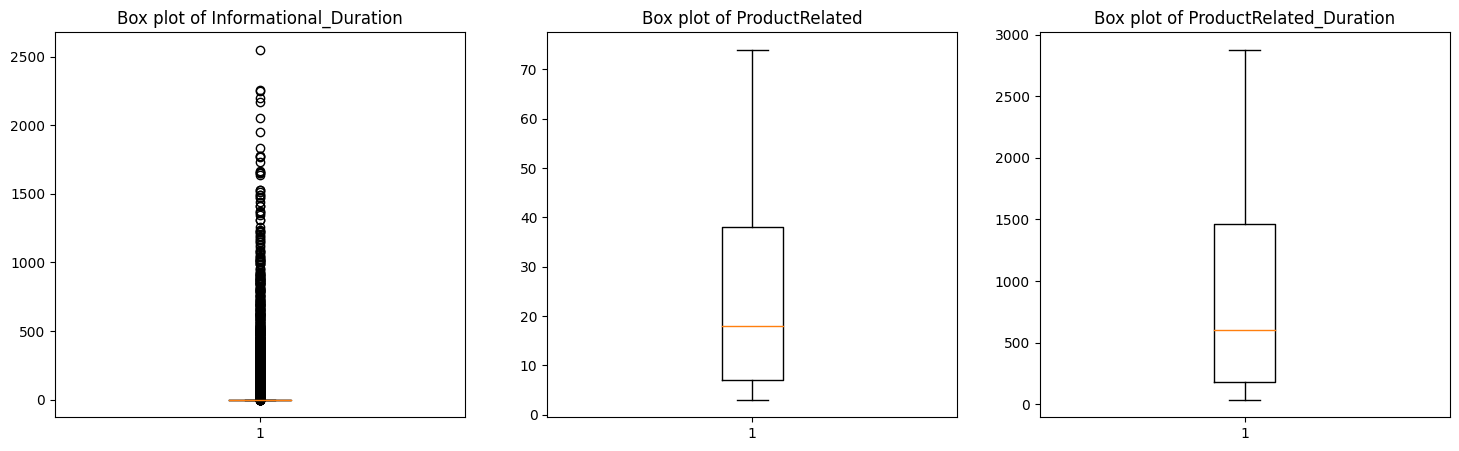

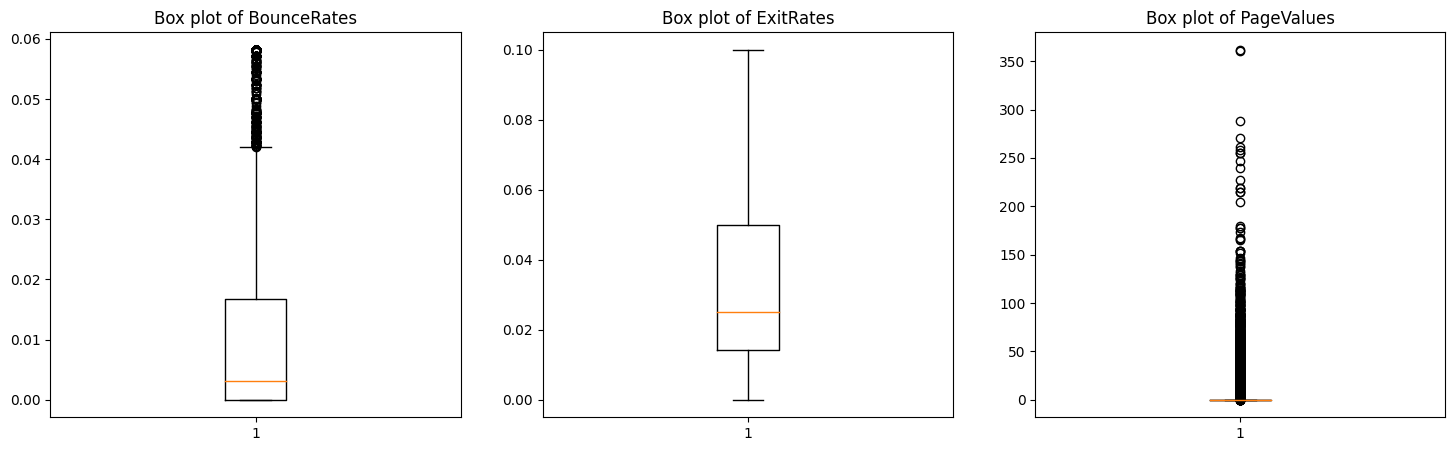

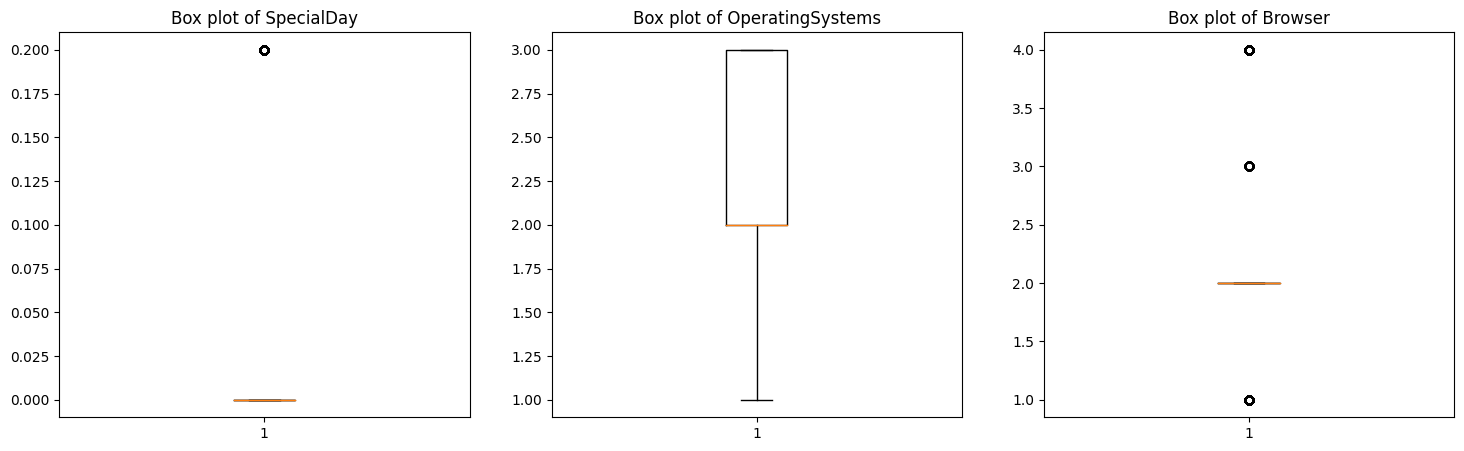

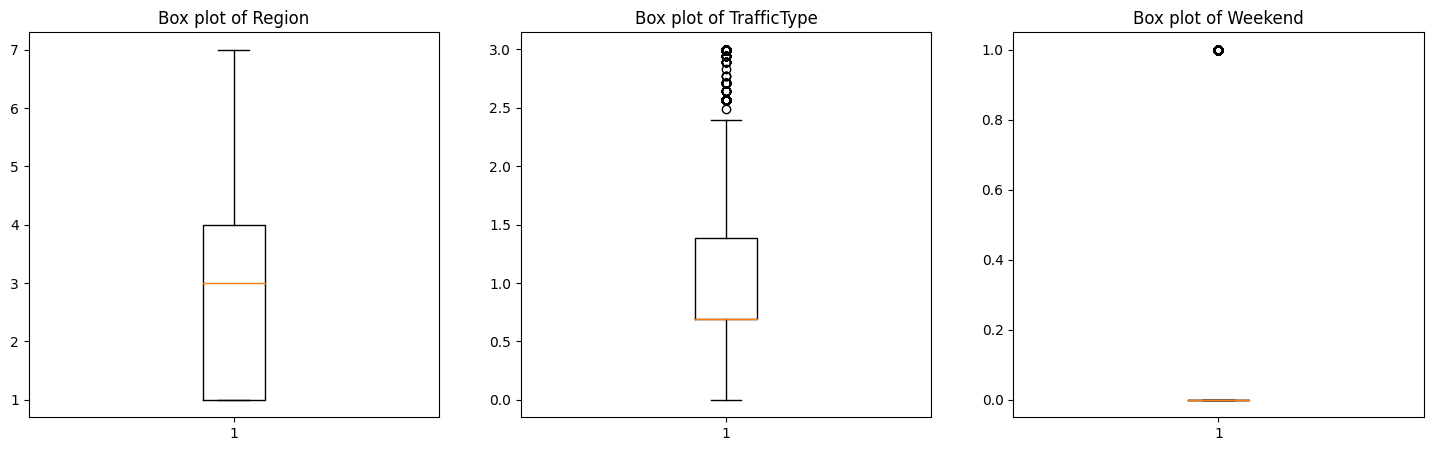

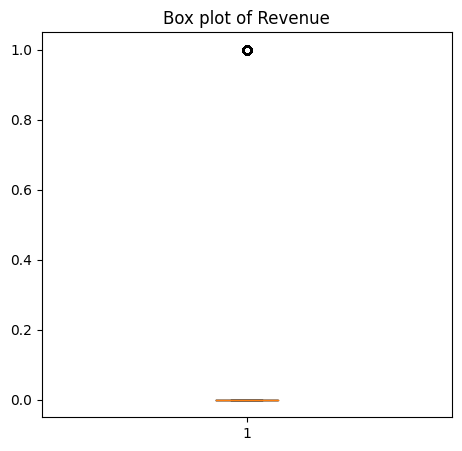

In [ ]:
col = intent.drop(['Month', 'VisitorType'], axis=1).columns

i=0

while i < len(col):

    plt.figure(figsize=(18,5))
    plt.subplot(1,3,1)
    plt.boxplot(intent[col[i]])
    title = 'Box plot of ' + str(col[i])
    plt.title(title)
    
    
    if i+1 < len(col):
        plt.subplot(1,3,2)
        plt.boxplot(intent[col[i+1]])
        title = 'Box plot of ' +  str(col[i+1])
        plt.title(title)

    if i+2 < len(col):
        plt.subplot(1,3,3)
        plt.boxplot(intent[col[i+2]])
        title = 'Box plot of ' +  str(col[i+2])
        plt.title(title)

    i+=3
    
plt.show()

# Data Exploration

<ipython-input-72-1442d35b9e66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(intent.corr())
<ipython-input-72-1442d35b9e66>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(intent.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')


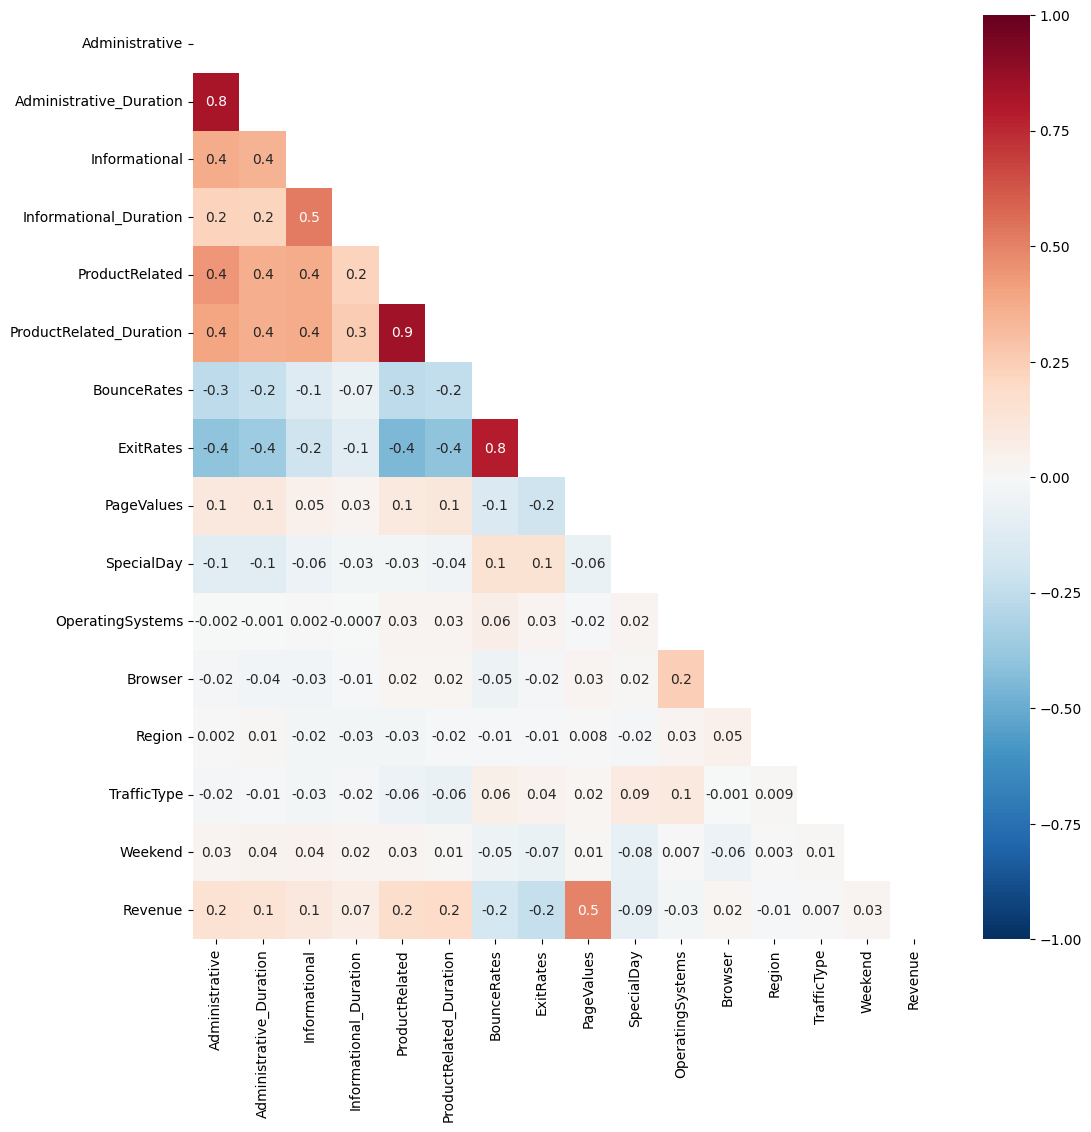

In [ ]:
matrix = np.triu(intent.corr())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(intent.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

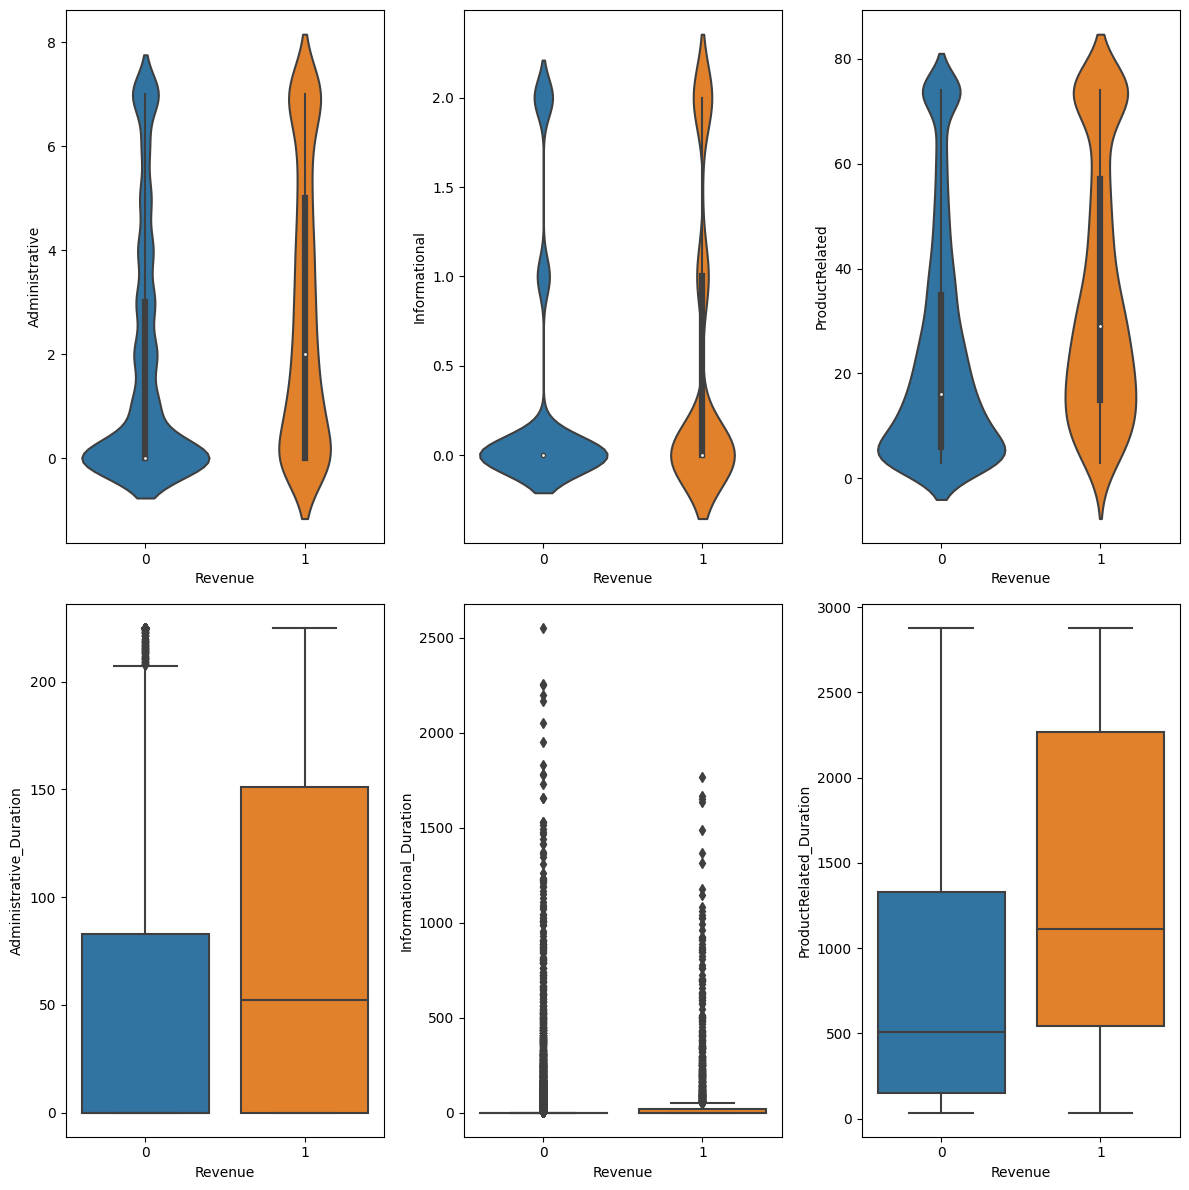

In [ ]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=intent, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=intent, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=intent, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=intent, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=intent, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=intent, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)


plt.tight_layout()
plt.show()

<ipython-input-75-af27bc3f0b16>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(intent['BounceRates'], bins=20, ax=ax1)
<ipython-input-75-af27bc3f0b16>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(intent['ExitRates'], bins=20, ax=ax2)
<ipython-input-75-af27bc3f0b16>:9: UserWarning: 

`distp

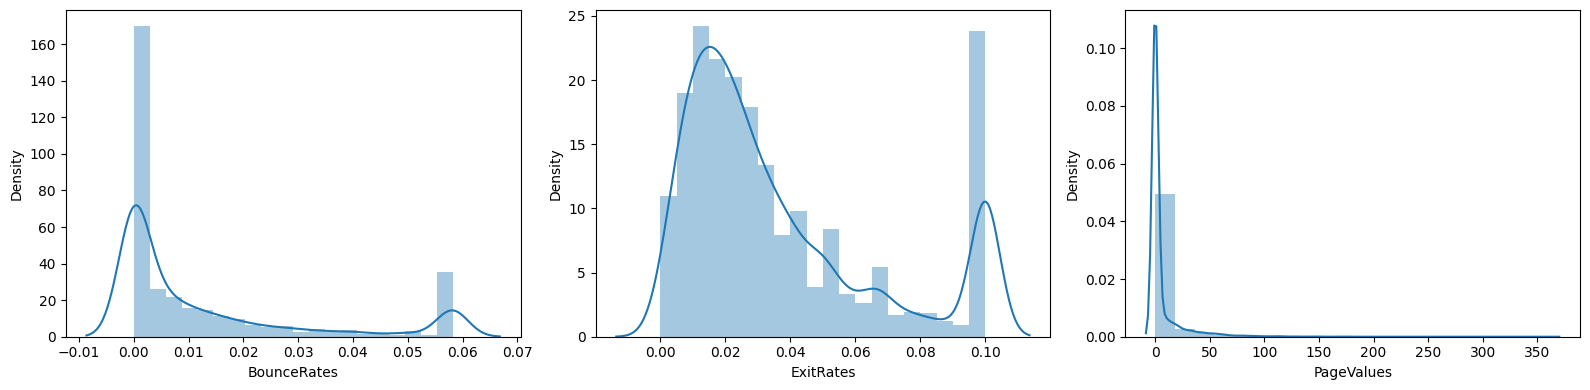

In [ ]:
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(intent['BounceRates'], bins=20, ax=ax1)
sns.distplot(intent['ExitRates'], bins=20, ax=ax2)
sns.distplot(intent['PageValues'], bins=20, ax=ax3)

plt.tight_layout()
plt.show()

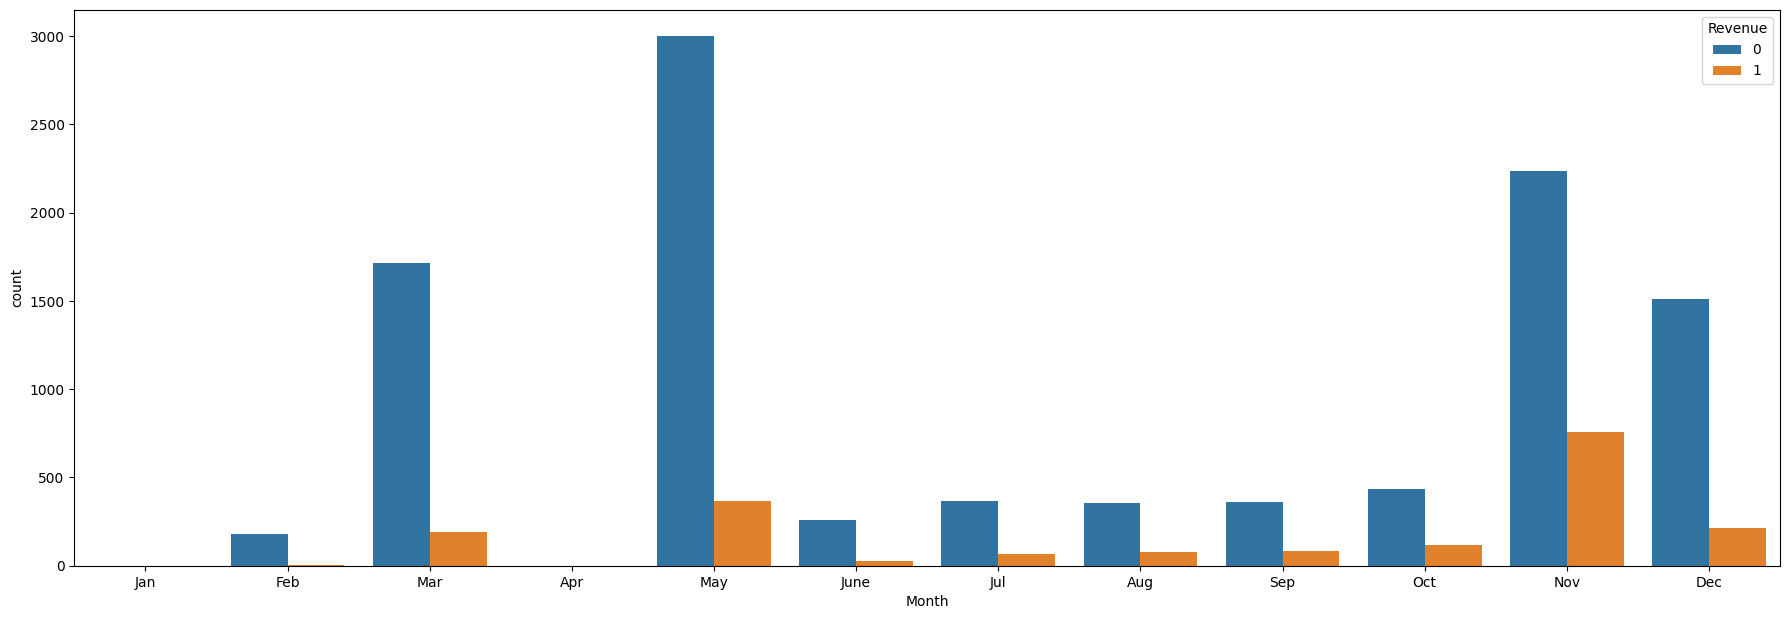

In [ ]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=intent, x='Month', hue='Revenue', ax=ax1, order=orderlist)

plt.tight_layout()
plt.show()

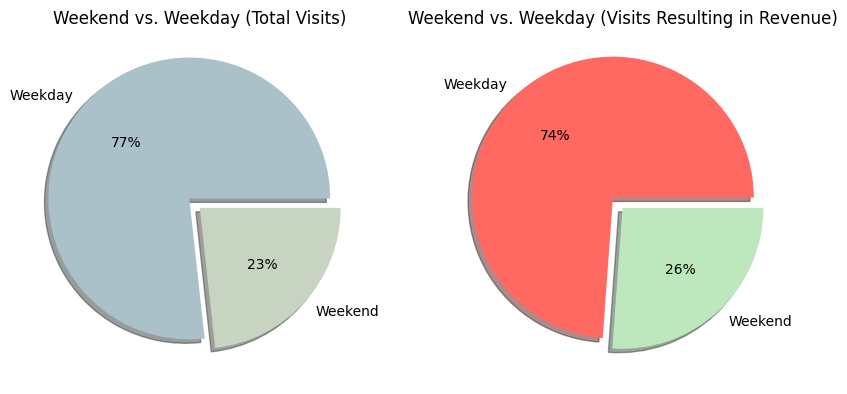

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(10, 5), subplot_kw=dict(aspect="equal"))
colors = ['#ABC1C9','#C7D4C1']
colors2 = ['#FF6962','#BDE7BD']

ax[0].pie(intent['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], colors=colors, autopct='%1.0f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
ax[0].set_title('Weekend vs. Weekday (Total Visits)')

ax[1].pie(intent[intent['Revenue'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], colors=colors2, autopct='%1.0f%%', shadow=True)
ax[1].set_title('Weekend vs. Weekday (Visits Resulting in Revenue)')

plt.show()

# Pre-Processing Data for Training

In [ ]:
#Convert Months and Visitor Types to number values in seperate columns to allow for easier training on the models
intentt = pd.concat([intent,pd.get_dummies(intent['Month'], prefix='Month')], axis=1).drop(['Month'],axis=1)
intentt = pd.concat([intentt,pd.get_dummies(intentt['VisitorType'], prefix='VisitorType')], axis=1).drop(['VisitorType'],axis=1)
print(intentt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [ ]:
intentt.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,3,36.0,0.058182,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,3,64.0,0.000000,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,3,36.0,0.058182,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,3,36.0,0.050000,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.5,0.020000,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


# Data Training

**SVC**

---


In [ ]:
from sklearn.svm import SVC


X = intentt.drop(['Revenue'], axis=1)
Y = intentt['Revenue'] 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

svc = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

svc.fit(X_train,y_train)

predict = svc.predict(X_test)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(X.iloc[:, 1:3])
X.iloc[:, 1:3] = imputer.transform(X.iloc[:, 1:3])

/usr/local/lib/python3.9/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(
<ipython-input-81-c10dc671f12b>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:, 1:3] = imputer.transform(X.iloc[:, 1:3])


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=16)
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_predict)
cm

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[3047,   82],
       [ 343,  227]])

Text(0.5, 470.55555555555554, 'Predicted Value')

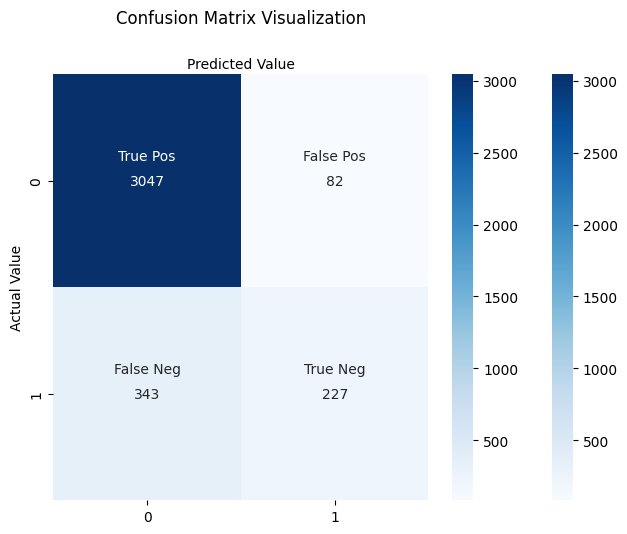

In [ ]:
import seaborn as sns

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()


labels = ['True Pos\n\n\n','False Pos\n\n\n','False Neg\n\n\n','True Neg\n\n\n']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

plt.title('Confusion Matrix Visualization', y=1.1)
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')

In [ ]:
score = svc.score(X_train, y_train)
print("SVC Score is:", score)

SVC Score is: 0.929556250724134


In [ ]:
accu_score = round(metrics.accuracy_score(y_test, predict),4)
print(accu_score)

0.87


In [ ]:
results = pd.DataFrame(columns = ['Model' , 'Model_score', 'Accuracy_score'])

In [ ]:
results = results.append({'Model': 'SVC', 'Model_score': score, 
                          'Accuracy_score': accu_score ,'features_group':1},
                        ignore_index=True)

<ipython-input-87-30517ddd5146>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': 'SVC', 'Model_score': score,


**k-NN**

---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X = intentt.drop(['Revenue'], axis=1)
Y = intentt['Revenue'] 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
# Predicting the Test set results
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[3070,   59],
       [ 408,  162]])

Text(0.5, 470.55555555555554, 'Predicted Value')

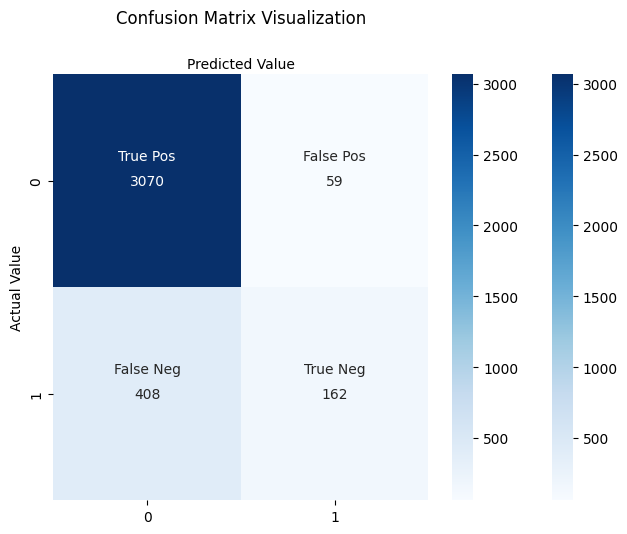

In [ ]:
import seaborn as sns

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()


labels = ['True Pos\n\n\n','False Pos\n\n\n','False Neg\n\n\n','True Neg\n\n\n']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

plt.title('Confusion Matrix Visualization', y=1.1)
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')

In [ ]:
#X_train, X_test, y_train, y_test
from sklearn.metrics import accuracy_score
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.837794  , 0.86509868, 0.86320627, 0.86915383, 0.86942417,
       0.8721276 , 0.87402001, 0.87266829, 0.87374966])

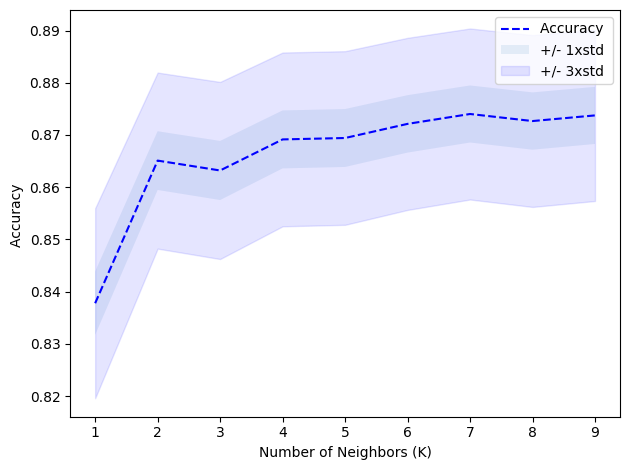

The best accuracy was 0.8740200054068668 with k= 7


In [ ]:
plt.plot(range(1,Ks),mean_acc,'b--')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="blue")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [ ]:
train_y_hat = knn.predict(X_train)
test_y_hat = knn.predict(X_test)
print('train accuracy score:' , accuracy_score(y_train,train_y_hat))
print('test accuracy score:' , accuracy_score(y_test,test_y_hat))

train accuracy score: 0.8821689259645464
test accuracy score: 0.8737496620708299


In [ ]:
knn_score = round(knn.score(X_train,y_train),4)
print('Train Accuracy Score:',knn_score)

Train Accuracy Score: 0.8822


In [ ]:
accu_score = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy Score:",accu_score)

Test Accuracy Score: 0.8737496620708299


In [ ]:
results = results.append({'Model': 'KNN', 'Model_score': knn_score, 
                          'Accuracy_score': accu_score ,'features_group':1},
                        ignore_index=True)

<ipython-input-97-dba0232cc0fd>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': 'KNN', 'Model_score': knn_score,


**Decision Tree Classsifier**

---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
import plotly.express as px

X = intentt.drop(['Revenue'], axis=1)
Y = intentt['Revenue'] 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtc = dtc.fit(X_train,y_train)
y_predict = dtc.predict(X_test)

accu_score = metrics.accuracy_score(y_test, y_predict)
print("Accuracy:", accu_score)

Accuracy: 0.8999729656663963


In [ ]:
from six import StringIO
import pydotplus
from IPython.display import Image  
from sklearn.tree import export_graphviz

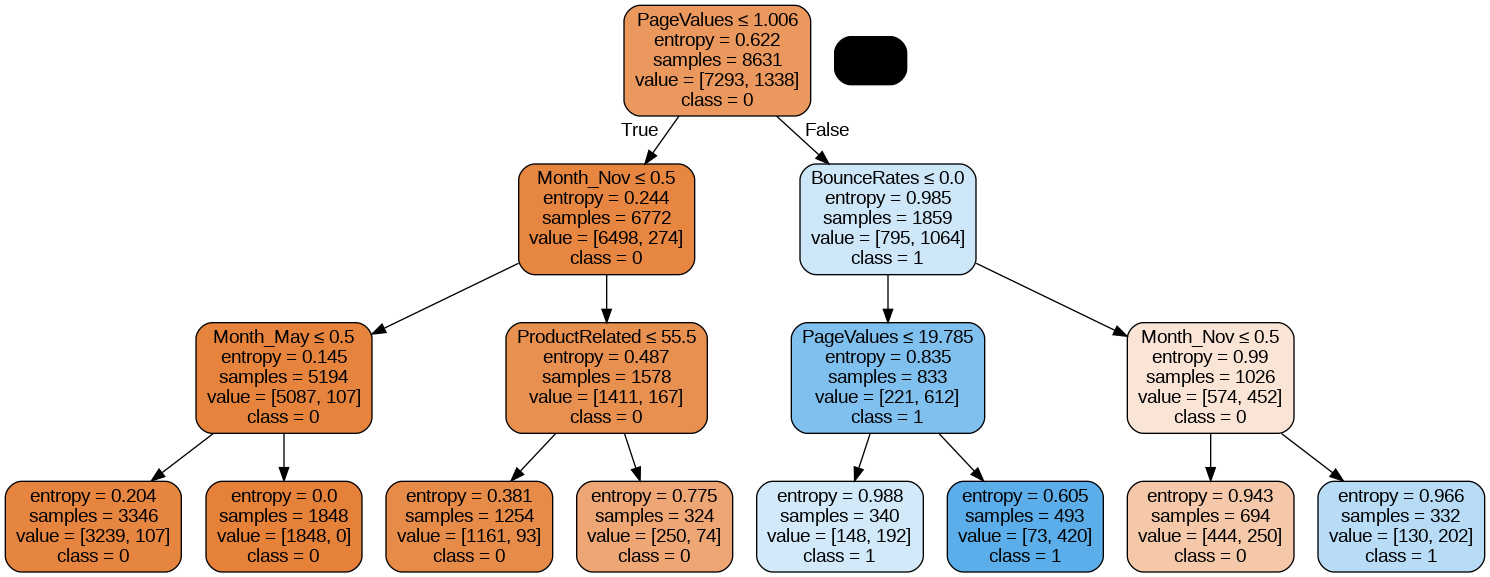

In [ ]:
dot_data = StringIO()

export_graphviz(dtc, out_file=dot_data,                  
filled=True, rounded=True,
special_characters=True, feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

graph.write_png('sub.png')
Image(graph.create_png())

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=16)
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_predict)
cm

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[3047,   82],
       [ 343,  227]])

Text(0.5, 470.55555555555554, 'Predicted Value')

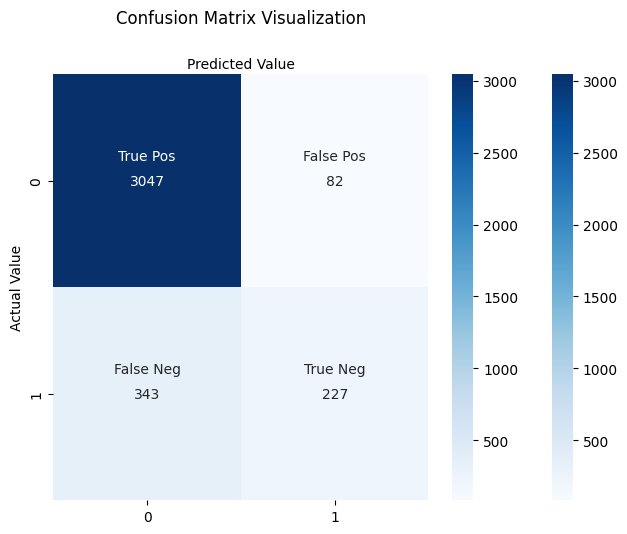

In [ ]:
import seaborn as sns

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()


labels = ['True Pos\n\n\n','False Pos\n\n\n','False Neg\n\n\n','True Neg\n\n\n']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

plt.title('Confusion Matrix Visualization', y=1.1)
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')

In [ ]:
dtc_score = round(dtc.score(X_train,y_train),4)
print(dtc_score)

0.8986


In [ ]:
results = results.append({'Model': 'Decision Tree', 'Model_score': dtc_score, 
                          'Accuracy_score': accu_score ,'features_group':1},
                        ignore_index=True)

<ipython-input-104-3427e2b140b8>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': 'Decision Tree', 'Model_score': dtc_score,


# Results

In [ ]:
results

,Model,Model_score,Accuracy_score,features_group
0,SVC,0.929556,0.870000,1.0
1,KNN,0.882200,0.873750,1.0
2,Decision Tree,0.898600,0.899973,1.0
